# Convolution

Convolution is a mathematical operation that is pervasive throughout the field of digital signal processing. It is defined as the integral of the product of the two functions after one is reversed and shifted. The formula for convolution is:

$$x(t) * h(t) \, = \, \int_{-\infty}^{\infty} x(t) \cdot h(t-\tau) d \tau$$

Convolution is *[commutative](https://en.wikipedia.org/wiki/Commutative_property)*, meaning that:

$$x(t) * h(t) \, = \, h(t) * x(t) \, = \, \int_{-\infty}^{\infty} h(t) \cdot x(t-\tau) d \tau$$

## Discrete Convolution

Discrete convolution is an operation on two discrete sequences of indefinte length, defined by the formula:

$$\begin{aligned} 
y(n) \, &= \, x(n) * h(n) \, = \, \sum_{k\,=\,-\infty}^{\infty} x(k) \cdot h(n-k) \\ 
&= \, h(n) * x(n) \, = \, \sum_{k\,=\,-\infty}^{\infty} h(k) \cdot x(n-k) \\
\end{aligned}$$ 

## Linear Convolution

Linear convolution is the convolution of a potentially infinite-length sequence $x(n)$ with a finite length sequence $h(n)$ of length $N$, where $h(n) = h(0), ... , h(N-1)$. Linear convolution is defined by the formula:

$$y(n) \, = \, x(n) * h(n) \, = \, \sum_{k=0}^{N-1} x(n-k) \cdot h(k)$$

In the case that $x(n)$ is also finite-length with length $M$, such that $x(n) = x(0), ..., x(M-1)$, the linear convolution is defined by the formula:

$$y(n) \, = \, x(n) * h(n) \, = \sum_{k \, = \, max\{0, \, n-M+1\}}^{min\{ \, n, \, \,  N - 1 \, \}} x(n-k) \cdot h(k)$$

For this case, the formula is defined only where $x(n)$ and $h(n)$ are overlapping. The output $y(n)$ has length $M+N-1$.



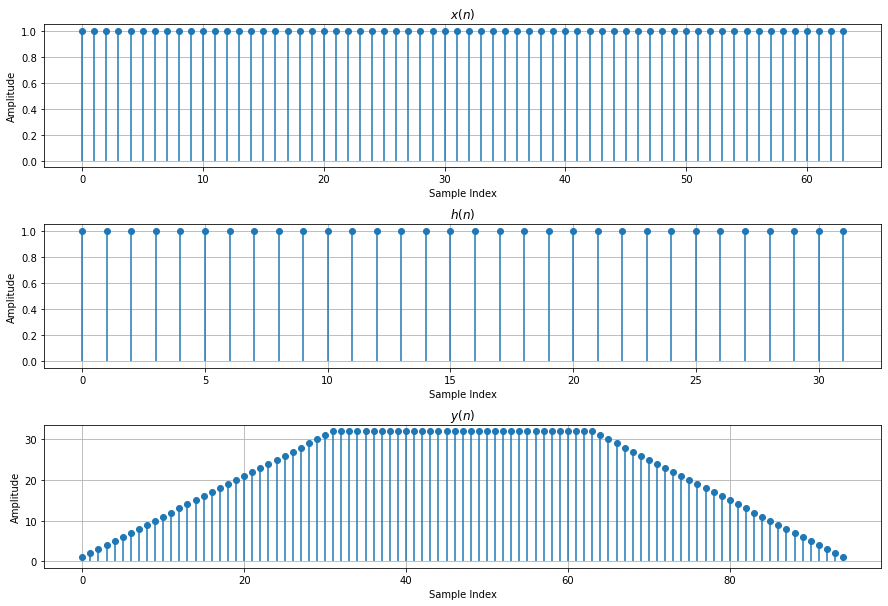

In [1]:
# Linear Convolution Example

import numpy as np
import matplotlib.pyplot as plt

# Create x(n)
M = 64
x = np.ones(M)
x_idxs = np.arange(0, M)

# Create h(n)
N = 32
h = np.ones(N)
h_idxs = np.arange(0, N)

# Create empty y(n)
y = np.empty(M+N-1)
y_idxs = np.arange(0, M+N-1)

# Perform convolution
for n in y_idxs:
    k_start = max(0, n-M+1)
    k_stop = min(n, N-1)
    k = np.arange(k_start, k_stop+1)
    y[n] = np.sum(x[n-k] * h[k])

# Plot convolution result
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# Plot x(n)
ax[0].grid()
ax[0].stem(x_idxs, x, basefmt=' ')
ax[0].set_title('$x(n)$')
ax[0].set_xlabel('Sample Index')
ax[0].set_ylabel('Amplitude')

# Plot h(n)
ax[1].grid()
ax[1].stem(h_idxs, h, basefmt=' ')
ax[1].set_title('$h(n)$')
ax[1].set_xlabel('Sample Index')
ax[1].set_ylabel('Amplitude')

# Plot y(n)
ax[2].grid()
ax[2].stem(y_idxs, y, basefmt=' ')
ax[2].set_title('$y(n)$')
ax[2].set_xlabel('Sample Index')
ax[2].set_ylabel('Amplitude')

plt.subplots_adjust(hspace=0.4)
pass


## Linear Convolution Using a Matrix-Vector Product 

[[Wefers, 2015]](README.md)

Linear convolution of two finite-length sequences can be expressed as the following matrix-vector product:

$$\begin{bmatrix} 
    y_0 \\ 
    y_1 \\
    \vdots \\
    y_{M+N-2}
\end{bmatrix} = 
\begin{bmatrix} 
    h_0     & 0         & \ldots    & 0         & 0         \\
    h_1     & h_0       & \ldots    & \vdots    & \vdots    \\
    h_2     & h_1       & \ldots    & 0         & 0         \\
    \vdots  & h_2       & \ldots    & h_0       & 0         \\
    h_{N-2} & \vdots    & \ldots    & h_1       & h_0       \\
    h_{N-1} & h_{N-2}   & \ddots    & \vdots    & h_1       \\
    0       & h_{N-1}   & \ldots    & h_{N-3}   & \vdots    \\
    0       & 0         & \ldots    & h_{N-2}   & h_{N-3}   \\
    \vdots  & \vdots    & \vdots    & h_{N-1}   & h_{N-2}   \\
    0       & 0         & 0         & \ldots    & h_{N-1}   \\
\end{bmatrix} 
\begin{bmatrix} 
    x_0 \\ 
    x_1 \\
    \vdots \\
    x_{M-1}
\end{bmatrix}
$$

where:
* $x(n)$ cooresponds to an $M$ element vector $\vec{x} = [x_0 \ldots x_{M-1}]^T$ 
* $y(n)$ cooresponds to an ($M+N-1$) element vector $\vec{y} = [y_0 \ldots y_{M+N-2}]^T$
* $h(n)$ is a convolution matrix with $M+N-1$ rows and $M$ columns, where the columns contaoin shifted versions of the sequence $h(n)$, padded by zeros

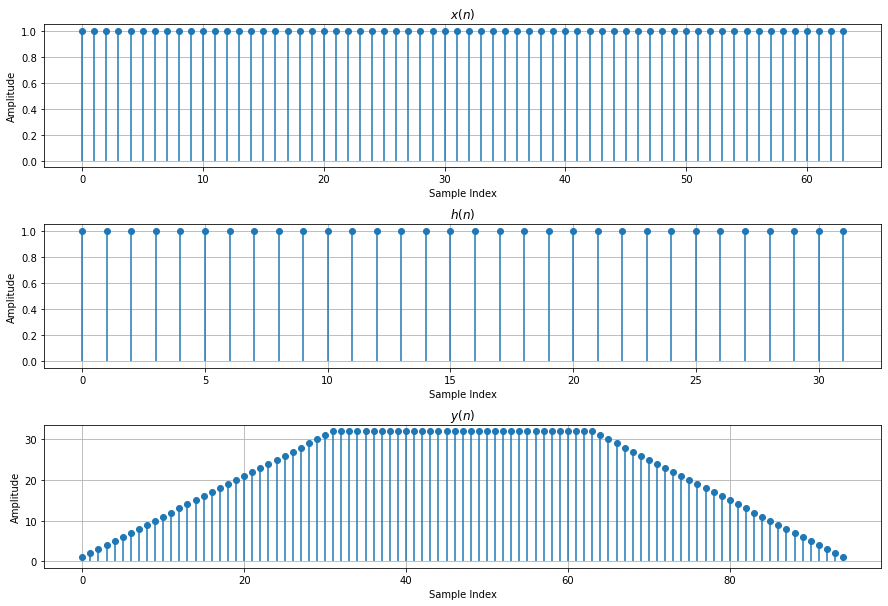

In [2]:
# Linear Convolution Using a Matrix-Vector Product Example

import numpy as np
import matplotlib.pyplot as plt

# Create x(n)
M = 64
x = np.ones((M, 1))
x_idxs = np.arange(0, M)

# Create h(n)
N = 32
h = np.ones(N)
h_idxs = np.arange(0, N)

# Create h(n) matrix
h_mat = np.zeros((M+N-1, M))
for n in range(0, M+N-1):
    col_start = max(0, n-N+1)
    col_stop = min(n+1, M)
    h_mat[n, col_start:col_stop] = h[:col_stop-col_start]

# Calculate y(n)
y = h_mat @ x
y_idxs = np.arange(0, M+N-1)

# Plot convolution result
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# Plot x(n)
ax[0].grid()
ax[0].stem(x_idxs, x, basefmt=' ')
ax[0].set_title('$x(n)$')
ax[0].set_xlabel('Sample Index')
ax[0].set_ylabel('Amplitude')

# Plot h(n)
ax[1].grid()
ax[1].stem(h_idxs, h, basefmt=' ')
ax[1].set_title('$h(n)$')
ax[1].set_xlabel('Sample Index')
ax[1].set_ylabel('Amplitude')

# Plot y(n)
ax[2].grid()
ax[2].stem(y_idxs, y, basefmt=' ')
ax[2].set_title('$y(n)$')
ax[2].set_xlabel('Sample Index')
ax[2].set_ylabel('Amplitude')

plt.subplots_adjust(hspace=0.4)
pass


## Linear Convolution Using a Polynomial Product 

[[Wefers, 2015]](README.md)

Linear convolution of two finite-length sequences can be expressed as the following polynomial product:

$$\begin{aligned}
y(n) \, &= \, x(n) \, * \, h(n) \quad \hat{=} \quad Y(z) = X(z) \cdot H(z) \\
&\text{where:} \\

X(z) \, &= \, \sum_{n=0}^{M-1} x(n) \, z^n \\
&= \, x(0) + x(1) \, z + x(2) \, z^2 + ... + x(M-1) \, z^{M-1} \\

H(z) \, &= \, \sum_{n=0}^{N-1} h(n) \, z^n \\
&= \, h(0) + h(1) \, z + h(2) \, z^2 + ... + h(N-1) \, z^{N-1} \\

Y(z) \, &= \, \sum_{n=0}^{M+N-2} y_n \, z^n \\
&= \, y_0 + y_1 \, z + y_2 \, z^2 + ... + y_{M+N-2} \, z^{M+N-2} \\
\text{with \quad} y_k &= \sum_{i=0}^{k} x_i \, h_{k-i} \\
\end{aligned}$$

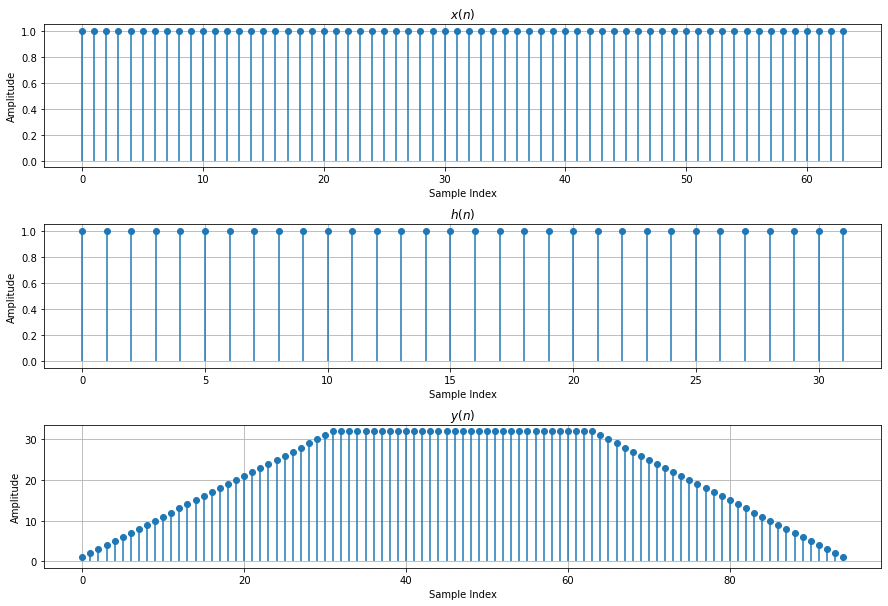

In [3]:
# Linear Convolution Using a Polynomial Product Example

import numpy as np
import matplotlib.pyplot as plt

# Create x(n)
M = 64
x = np.ones(M)
x_idxs = np.arange(0, M)

# Create h(n)
N = 32
h = np.ones(N)
h_idxs = np.arange(0, N)

# Calculate y(n)
y = np.polymul(x,h)
y_idxs = np.arange(0, M+N-1)

# Plot convolution result
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# Plot x(n)
ax[0].grid()
ax[0].stem(x_idxs, x, basefmt=' ')
ax[0].set_title('$x(n)$')
ax[0].set_xlabel('Sample Index')
ax[0].set_ylabel('Amplitude')

# Plot h(n)
ax[1].grid()
ax[1].stem(h_idxs, h, basefmt=' ')
ax[1].set_title('$h(n)$')
ax[1].set_xlabel('Sample Index')
ax[1].set_ylabel('Amplitude')

# Plot y(n)
ax[2].grid()
ax[2].stem(y_idxs, y, basefmt=' ')
ax[2].set_title('$y(n)$')
ax[2].set_xlabel('Sample Index')
ax[2].set_ylabel('Amplitude')

plt.subplots_adjust(hspace=0.4)
pass


## Linear Convolution Computational Complexity

[[Wefers, 2015]](README.md)

Linear convolution can implemented using tapped delay line (illustrated below). The computational complexity of linear convolution can be calculated for both infinite and finite length input sequences.

![](images/tapped_delay_line.png 'Tapped Delay Line')

For an infinite length input sequence with $h(n)$ of length $N$, the computational complexity can be calculated as the number of arithmetic operations *per output sample* using the formula:

$$T(N) \, = \, 2N - 1 \quad \in \quad O(N)$$

where there are $N$ multiplications and $N-1$ additions per output sample. 

For a finite length input sequence of length $M$ and an $h(n)$ of length $N$, the computational complexity can be calculated as the *total* number of arithmetic operations using the formula:

$$T(M,N) \, = \, 2 M N - (M + N - 1) \quad \in \quad O(M \cdot N)$$



## Circular Convolution

[[Wefers, 2015]](README.md)

Circular convolution (AKA cyclic convolution) is an adpted form of discrete convolution that assumes some periodicity of the input sequences and takes advantage of that periodicity. 

$$\begin{aligned} 
\tilde{y}(n) \, &= \, x(n) \, \circledast \, h(n) \\ 
&= \sum_{k = 0}^{N-1} \tilde{x}(n - k) \cdot \tilde{h}(k) \\ 
&= \sum_{k = 0}^{N-1} x{\langle n - k\rangle}_N \cdot h(k) 
\end{aligned}$$

where $\tilde{x}(n) \, = \, x{\langle n \rangle}_N$ is the *periodic continuation* of $x(n)$, meaning that the indices $-\infty \le n \le \infty$ are evaluated modulo the period $N$. ${\langle \cdot \rangle}_N$ denotes the residule of the integer $n$ modulo $N$. Since the sum is only evaluated from $k = 0$ to $N-1$, the modulo can be dropped from the $h(k)$ term.

## Circular Convolution Using a Matrix-Vector Product 

[[Wefers, 2015]](README.md)

Circular convolution can be expressed as a matrix-vector product of the form $\vec{\tilde{y}} = C \vec{x}$, where $x(n)$, $h(n)$ and $\tilde{y}(n)$ can be expressed as the $N$-element vectors $\vec{x}$, $\vec{h}$ and $\vec{\tilde{y}}$, and $C$ is an $N \times N$ [Toeplitz matrix](https://en.wikipedia.org/wiki/Toeplitz_matrix), that is called a *circulant matrix* or a *circular convolution matrix*. $C$ has the property that each row/column vector is shifted by one element. Below is an example of a length-5 circular convolution.

$$\begin{bmatrix} 
    \tilde{y}_0 \\ 
    \tilde{y}_1 \\
    \tilde{y}_2 \\
    \tilde{y}_3 \\
    \tilde{y}_4 
\end{bmatrix} = 
\begin{bmatrix} 
    h_0 & h_2   & h_1   & h_0   & h_2   \\
    h_1 & h_0   & h_2   & h_1   & h_0   \\
    h_2 & h_1   & h_0   & h_2   & h_1   \\
    h_0 & h_2   & h_1   & h_0   & h_2   \\
    h_1 & h_0   & h_2   & h_1   & h_0   \\
\end{bmatrix} 
\begin{bmatrix} 
    x_0 \\ 
    x_1 \\
    x_2 \\
    x_3 \\
    x_4 
\end{bmatrix}
$$

## Circular Convolution Using a Polynomial Product 

[[Wefers, 2015]](README.md)

Circular convolution can be expressed as the following polynomial product:

$$y(n) \, = \, x(n) \, \circledast \, h(n) \quad \hat{=} \quad Y \equiv X \cdot H \quad mod \quad z^N - 1$$

Below is an example of circular convolution as a polynomial product where $N = 3$.

$$\begin{array}{l|l}

x = \begin{array}{ccc}
        [2 &-1 &3]
    \end{array} 
    & \quad X = 2 - z + 3z^2 \\
h = \begin{array}{ccc} 
        [1 &2 &-1] 
    \end{array} 
    & \quad H = 1 +2z - z^2 \\
& \\
x * h = \begin{array}{ccccc} 
            [2 &3 &-1 &7 &-3] 
        \end{array} 
            & \begin{aligned}  
                \quad X \cdot H &= (2 -z + 3z^2) \cdot (1 +2z - z^2) \\
                & = 2 + 3z -z^2 + 7z^3 - 3z^4
            \end{aligned} \\
& \\
x \, \circledast \, h = 
    \begin{array}{ccc}
        [9 &0 &-1]
    \end{array}
    &\begin{aligned}
        \quad X \cdot H &= 2 + 3z -z^2 + 7z^3 - 3z^4 \\
        &= (7-3z) \cdot (z^3 - 1) + (9 - z^2) \\
        \quad X \cdot H & \quad mod \quad (z^3 - 1) = 9-z^2 
    \end{aligned}
\end{array}$$

## Linear Convolution Using Circular Convolution

[[Wefers, 2015]](README.md)

Linear convolution can be implemented using circular convolution by zero padding the inputs, convolving them and truncating the result. More formally, given input sequences $x(n)$ of length $N$ and $h(n)$ of length $M$, the $K$-point circular convolution is equal to the $M \times N$ linear convolution when the period $K$ is sufficiently large such that $M+N-1$ samples do not overlap in time. This can be expressed as follows:

$$\mathcal{R}_{M+N-1} \left\{ \mathcal{P}_K\left\{ \, x(n) \, \right\} \, \circledast_K \, \mathcal{P}_K\left\{ \, h(n) \, \right\} \right\} \, = \, x(n) * h(n) \quad \Longleftrightarrow \quad K \ge M + N - 1 $$

where $\mathcal{P}_k$ is a padding operator that appends zeros to the end of a sequence until it is length $K$ and $\mathcal{R}_{M+N-1}$ is a rectangular window that truncates the first $M+N-1$ samples. If $K \lt M+N-1$, it is not guaranteed that the linear convolution results do not overlap and the above equality does not hold true.

## Toom-Cook Algorithm

[[Wefers, 2015]](README.md)

The Toom-Cook algorithm is a fast convolution algorithm that can be used to implement linear convolution. It is typically used for short convolutions and becomes less efficient for longer convolutions. The motivation behind the Toom-Cook algorithm comes from the [Linear Convolution Using a Polynomial Product](#linear-convolution-using-a-polynomial-product) section above. The goal is to find the coefficients $y_k$ of the product polynomial $Y(z) = X(z) \cdot H(z)$. Since the polynomial $Y(z)$ has degree $M+N-2$ it is uniquely determined by $M+N-1$ data points. The Toom-Cook algorithm evaluates the polynomials $X(z)$ and $H(z)$ for a set of data points $\alpha_i$ and then multiplies their values to get $Y(\alpha_i) = X(\alpha_i) \cdot H(\alpha_i)$. The polynomial product $Y(z)$ is then constructed using [Lagrange interpolation](https://en.wikipedia.org/wiki/Lagrange_polynomial) and its coefficients $y_k$ are obtained. The algorithm consists of the following steps:

1. Select distinct values for $\alpha_0, ... , \alpha_{M+N-2}$
1. Evaluate $X(\alpha_i)$ and $H(\alpha_i)$ for all points $\alpha_i$ and then compute $Y(\alpha_i) = X(\alpha_i) \cdot H(\alpha_i)$
1. Use Lagrange interpolation to construct $Y(z)$ from the $M+N-1$ data points $(\alpha_i, Y(\alpha_i))$ as follows:

$$\begin{aligned} 
&Y(z) = \sum_{n=0}^{M+N-2} Y(\alpha_i) L_i(z) \\
\text{where}& \\
&L_i(z) = \prod_{\substack{k=0 \\ k\neq i}}^{M+N-2} \frac{z - \alpha_i}{\alpha_k - \alpha_i}
\end{aligned}$$


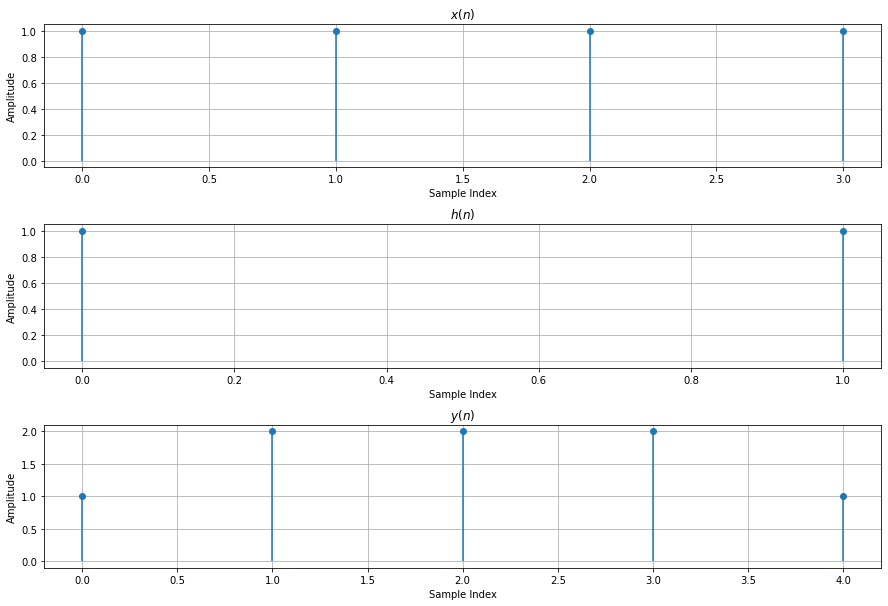

In [4]:
# Toom-Cook Algorithm Example
# In this example, M and N should be small. The scipy Lagrange 
# interpolation is numerically unstable for large polynomials

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Create x(n)
M = 4
x = np.ones(M)
x_idxs = np.arange(0, M)

# Create h(n)
N = 2
h = np.ones(N)
h_idxs = np.arange(0, N)

# Create distinct supporting points
ai = np.arange(np.ceil(-(M+N-1)/2), np.ceil((M+N-1)/2))
# ai = np.arange(1,M+N)

# Compute X(a)
Xa = np.empty_like(ai)
for idx, a in enumerate(ai):
    Xa[idx] = np.sum(x*ai[idx]**np.arange(0, M))

# Compute H(a)
Ha = np.empty_like(ai)
for idx, a in enumerate(ai):
    Ha[idx] = np.sum(h*ai[idx]**np.arange(0, N))

# Compute Y(a)
Ya = Xa * Ha

# Compute Y(z) using lagrange interpolation
Yz = lagrange(ai, Ya)

# y(n) is obtained by getting the coefficients from the Y(z) polynomial
y = np.array(Yz)
y_idxs = np.arange(0, M+N-1)

# Plot convolution result
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# Plot x(n)
ax[0].grid()
ax[0].stem(x_idxs, x, basefmt=' ')
ax[0].set_title('$x(n)$')
ax[0].set_xlabel('Sample Index')
ax[0].set_ylabel('Amplitude')

# Plot h(n)
ax[1].grid()
ax[1].stem(h_idxs, h, basefmt=' ')
ax[1].set_title('$h(n)$')
ax[1].set_xlabel('Sample Index')
ax[1].set_ylabel('Amplitude')

# Plot y(n)
ax[2].grid()
ax[2].stem(y_idxs, y, basefmt=' ')
ax[2].set_title('$y(n)$')
ax[2].set_xlabel('Sample Index')
ax[2].set_ylabel('Amplitude')

plt.subplots_adjust(hspace=0.4)
pass

## Karatsuba Convolution Algorithm

[[Wefers, 2015]](README.md)

The Karatsuba convolution algorithm is a divide and conquer technique that can reduce the computational complexity of $N \times N$ linear convolutions from $O(N^2)$ to $O(N^{{{log}_2}3})$. This relies on N being a power of 2. Consider the case where we have the following sequences of length $2N$:
$$x(n) \, = \, x(0), ... \, , x(2N-1) \quad \quad \quad h(n) \, = \, h(0), ... \, , h(2N-1)$$

These sequences can then be broken up into 4 subsequences as follows: 
$$x_0(n) \, = \, x(0), ... \, , x(N-1) \quad \quad \quad \quad h(n) \, = \, h(0), ... \, , h(N-1)$$
$$x_1(n) \, = \, x(N), ... \, , x(2N-1) \quad \quad \quad h(n) \, = \, h(N), ... \, , h(2N-1)$$

The $2N \times 2N$ convolution $x(n) * h(n)$ can be expressed as four $N \times N$ subconvolutions:

$$\begin{aligned}
y_0(n) &= x_0(n) * h_0(n) \\
y_1(n) &= x_0(n) * h_1(n) + x_1(n) * h_0(n) \\
y_2(n) &= x_1(n) * h_1(n) \\
\end{aligned}$$

The output $y(n)$ can be computed by overlapping and adding the sequences $y_0(n)$, $y_1(n)$ and $y_2(n)$ as illustrated below:

$$y(n) = y_0(n) + y_1(n - N) + y_2(n - 2N)$$

![](images/karatsuba_convolution_overlap_add.png 'Overlap-Add scheme used in the Karatsuba convolution algorithm')

The Karatsuba algorithm uses the following equivalence to reduce the number of $N \times N$ subconvolutions from four to three at the expense of $2N$ extra additions and $2 \cdot (2N-1)$ extra subtractions:
$$\begin{aligned}
y_1(n) &= x_0(n) * h_1(n) + x_1(n) * h_0(n) \\
y_1(n) &= \left[ x_0(n) + x_1(n) \right] * \left[ h_1(n) + h_1(n) \right] - \underbrace{x_0(n) * h_0(n)}_{= y_0(n)} - \underbrace{x_1(n) * h_1(n)}_{= y_2(n)}\\
\end{aligned}$$ 

The Karatsuba convolution algorithms computational advantages are realized when preformed recursivly and the equation above is applied at every stage. 

### Karatsuba Convolution Algorithm Computational Complexity
The Karatsuba convolution algorithm has a runtime computational complexity of $O(N^{{{log}_2}3})$. The number of arithmetic operations to compute an $N \times N$ Karatsuba convolution can be described by the following equation:

$$T(N) \, = \, 7 \cdot 3^{{{log}_2}N} - 8N + 2$$


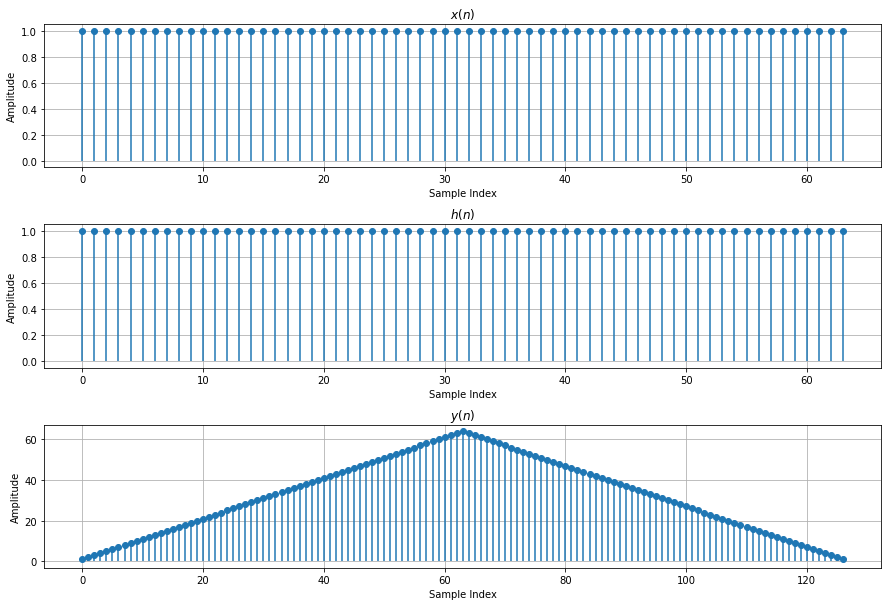

In [5]:
# Karatsuba Convolution Algorithm Example

import numpy as np
import matplotlib.pyplot as plt

# N should be a power of 2
N = 32

# Create x(n), x0(n) and x1(n)
x = np.ones(2*N)
x0 = x[0:N]
x1 = x[N:2*N]
x_idxs = np.arange(0, 2*N)

# Create h(n), h0(n) and h1(n)
h = np.ones(2*N)
h0 = h[0:N]
h1 = h[N:2*N]
h_idxs = np.arange(0, 2*N)

# Create empty subconvolution arrays, y0(n), y1(n), y2(n)
y0 = np.empty(2*N-1)
y1 = np.empty(2*N-1)
y2 = np.empty(2*N-1)
y_sub_idxs = np.arange(0, 2*N-1)

# Compute subconvolutions y0(n), y1(n) and y2(n)
for n in y_sub_idxs:
    k_start = max(0, n-N+1)
    k_stop = min(n, N-1)
    k = np.arange(k_start, k_stop+1)
    y0[n] = np.sum(x0[n-k] * h0[k])
    y2[n] = np.sum(x1[n-k] * h1[k])
    x_sum = x0 + x1
    h_sum = h0 + h1
    y1[n] = np.sum(x_sum[n-k] * h_sum[k]) - y0[n] - y2[n]

# Compute y(n), overlapping and adding the partial convolution resultss
y = np.zeros(4*N-1)
y_idxs = np.arange(0, 4*N-1)
y[0:2*N-1] = y0
y[N:3*N-1] += y1
y[2*N:4*N-1] += y2 

# Plot convolution result
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# Plot x(n)
ax[0].grid()
ax[0].stem(x_idxs, x, basefmt=' ')
ax[0].set_title('$x(n)$')
ax[0].set_xlabel('Sample Index')
ax[0].set_ylabel('Amplitude')

# Plot h(n)
ax[1].grid()
ax[1].stem(h_idxs, h, basefmt=' ')
ax[1].set_title('$h(n)$')
ax[1].set_xlabel('Sample Index')
ax[1].set_ylabel('Amplitude')

# Plot y(n)
ax[2].grid()
ax[2].stem(y_idxs, y, basefmt=' ')
ax[2].set_title('$y(n)$')
ax[2].set_xlabel('Sample Index')
ax[2].set_ylabel('Amplitude')

plt.subplots_adjust(hspace=0.4)
pass